Fit simple models predicting female behavior from surrogate neural activity.

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_lin_single

cc = np.concatenate

MAX_TR = 276
NTR = 50
NTRAIN = int(round(.8*NTR))
NSPLIT = 30

STRAINS = ['NM91', 'ZH23']

In [10]:
# NRL_MDL = 'lin'  # linear neural model
# NRL_MDL = 'ln'  # lin-nonlinear neural model
NRL_MDL = 'dyn'  # dynamical neural model

TARGS = ['FFV_MN_60', 'FFV']

DF_BAKER_FIT_PARAM = pd.read_csv(f'data/simple/neur/baker_{NRL_MDL}_fit_param.csv') 

PFX_BHV_0 = f'data/simple/mlv/neur_basic/baker_{NRL_MDL}/mlv_c_baker_{NRL_MDL}'
PFX_BHV_1 = f'data/simple/behav_xtd/behav_xtd'

SAVE_FILE = f'data/simple/mlv/neur_basic/baker_single_{NRL_MDL}_{TARGS[0].lower()}_{NTR}_tr.npy'

DF_BAKER_FIT_PARAM

In [ ]:
R_COLS_ALL = [f'R_{ir}' for ir in DF_BAKER_FIT_PARAM.EXPT_ID]

r2s_train = np.nan * np.zeros((NSPLIT, len(R_COLS_ALL)))
r2s_test = np.nan * np.zeros((NSPLIT, len(R_COLS_ALL)))

for csplit in range(NSPLIT):
    sys.stdout.write(f'Split {csplit}')
    np.random.seed(csplit)
    rnd_tr_idxs = np.random.permutation(MAX_TR)
    idxs_train = rnd_tr_idxs[:NTRAIN]
    idxs_test = rnd_tr_idxs[NTRAIN:NTR]
    rgr = skl_fit_lin_single(PFX_BEHAV, R_COLS_ALL, TARG, idxs_train, idxs_test, progress=True)
    r2s_train[csplit, :] = rgr.r2_train
    r2s_test[csplit, :] = rgr.r2_test
    sys.stdout.write('\n')

In [ ]:
# save r2, weights, and example predictions
save_data = {
    'r2s_train': r2s_train,
    'r2s_test': r2s_test,
    'ntr': NTR,
    'nsplit': NSPLIT,
}

np.save(SAVE_FILE, np.array([save_data]))

Max train R2: 0.017076491375305296
Max test R2: 0.012012819039995652


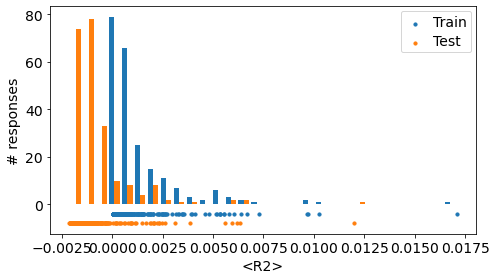

In [11]:
data = np.load(SAVE_FILE, allow_pickle=True)[0]
r2_train_means = data['r2s_train'].mean(axis=0)
r2_test_means = data['r2s_test'].mean(axis=0)


fig, ax = plt.subplots(1, 1, figsize=(7, 4), tight_layout=True)
ax.hist(np.transpose([r2_train_means, r2_test_means]), bins=30)
ax.scatter(r2_train_means, -4*np.ones(len(r2_train_means)), s=10)
ax.scatter(r2_test_means, -8*np.ones(len(r2_test_means)), s=10)
ax.legend(['Train', 'Test'])

set_plot(ax, x_label='<R2>', y_label='# responses', font_size=14)

print('Max train R2:', np.nanmax(r2_train_means))
print('Max test R2:', np.nanmax(r2_test_means))